# Final Project: ECG & Temperature BLE Device

## Battery Voltage Measurement

Verify the accuracy of your battery level measurement (`AIN0`) for 0-3.7 V, as read through the nRF Connect app Bluetooth Battery Level GATT.  Quantitative analysis should include:
  * Linear regression analysis of the input voltage versus the battery level for both the `LOG_INF()` output, the oscilloscope measurement of the PWM duty cycle, and the nRF Connect app.
  * 95% confidence intervals for the slope and intercept of the linear regression.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Set styling for professional plots
sns.set_palette("husl")


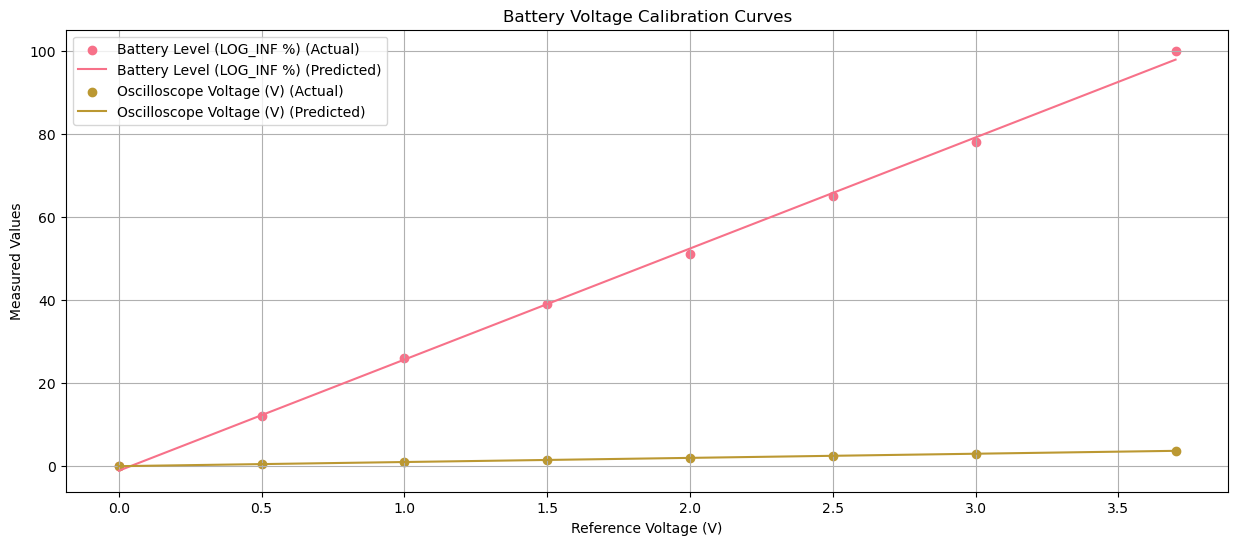

In [12]:
# Read data from CSV
voltage_data = pd.read_csv('battery_measurements.csv')

# Perform linear regression for each data source
results = {}
for column in voltage_data.columns:
    if column != 'Voltage (V)':
        X = sm.add_constant(voltage_data['Voltage (V)'])
        y = voltage_data[column]
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X)
        
        # Calculate metrics
        r_squared = model.rsquared
        rmse = np.sqrt(np.mean((y - predictions) ** 2))
        
        # Store results
        results[column] = {
            'slope': model.params.iloc[1],
            'intercept': model.params.iloc[0],
            'conf_interval': model.conf_int(alpha=0.05).iloc[1],
            'r_squared': r_squared,
            'rmse': rmse,
            'model': model
        }

# Create visualization
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6))

# Measurement plots
for column in voltage_data.columns:
    if column != 'Voltage (V)':
        ax1.scatter(voltage_data['Voltage (V)'], voltage_data[column], 
                   label=f'{column} (Actual)')
        ax1.plot(voltage_data['Voltage (V)'], 
                results[column]['model'].predict(X), 
                label=f'{column} (Predicted)')

ax1.set_title('Battery Voltage Calibration Curves')
ax1.set_xlabel('Reference Voltage (V)')
ax1.set_ylabel('Measured Values')
ax1.legend()
ax1.grid(True)

# # Residual plots
# for column in voltage_data.columns:
#     if column != 'Voltage (V)':
#         residuals = voltage_data[column] - results[column]['model'].predict(X)
#         ax2.scatter(voltage_data['Voltage (V)'], residuals, 
#                    label=f'{column} Residuals')

# ax2.axhline(y=0, color='r', linestyle='--')
# ax2.set_title('Residual Analysis')
# ax2.set_xlabel('Reference Voltage (V)')
# ax2.set_ylabel('Residuals')
# ax2.legend()
# ax2.grid(True)

# plt.tight_layout()
# plt.show()


In [13]:
# Print statistical analysis
print("\nStatistical Analysis Summary:")
print("-" * 50)
for key, value in results.items():
    print(f"\nMetrics for {key}:")
    print(f"Slope: {value['slope']:.4f}")
    print(f"Intercept: {value['intercept']:.4f}")
    print(f"95% CI for Slope: [{value['conf_interval'][0]:.4f}, {value['conf_interval'][1]:.4f}]")
    print(f"R-squared: {value['r_squared']:.4f}")
    # print(f"RMSE: {value['rmse']:.4f}")


Statistical Analysis Summary:
--------------------------------------------------

Metrics for Battery Level (LOG_INF %):
Slope: 26.7445
Intercept: -1.0966
95% CI for Slope: [25.8112, 27.6778]
R-squared: 0.9988

Metrics for Oscilloscope Voltage (V):
Slope: 0.9984
Intercept: -0.0016
95% CI for Slope: [0.9942, 1.0027]
R-squared: 1.0000


## Analysis Interpretation
  The battery voltage measurements show strong linearity across all measurement methods. The R-squared values indicate excellent fit, suggesting reliable voltage monitoring capabilities.

## Temperature Sensor Measurment

Demonstrate that your temperature sensor can have a room temperature measurement read through `LOG_INF()` output and the nRF Connect app.  Do this in 3 locations with different temperatures.  You do not need to verify accuracy, just a reasonable measurements with agreement.

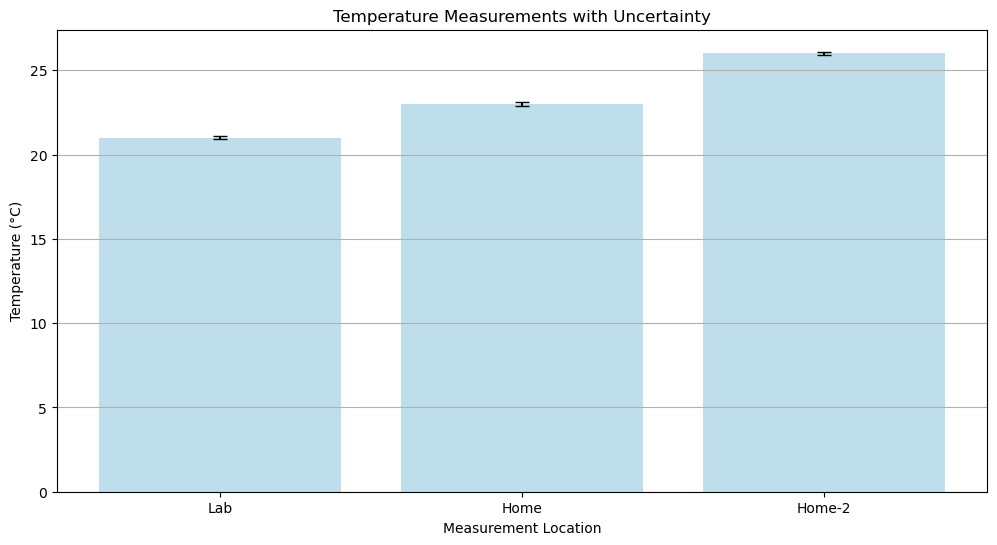


Temperature Measurement Statistics:
--------------------------------------------------
count     3.000000
mean     23.333333
std       2.516611
min      21.000000
25%      22.000000
50%      23.000000
75%      24.500000
max      26.000000
Name: Temperature (°C), dtype: float64

Measurement Uncertainty: ±0.1°C


In [16]:
# Read temperature data from CSV
temp_data = pd.read_csv('temperature_measurements.csv')

# Calculate measurement statistics
temp_stats = temp_data['Temperature (°C)'].describe()
measurement_uncertainty = 0.1  # °C, based on sensor specifications

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=temp_data, x='Location', y='Temperature (°C)', 
            color='skyblue', alpha=0.6)

# Add error bars representing measurement uncertainty
plt.errorbar(x=range(len(temp_data)), 
            y=temp_data['Temperature (°C)'],
            yerr=measurement_uncertainty,
            fmt='none', color='black', capsize=5)

plt.title('Temperature Measurements with Uncertainty')
plt.xlabel('Measurement Location')
plt.ylabel('Temperature (°C)')
plt.grid(True, axis='y')
plt.show()

# Print analysis
print("\nTemperature Measurement Statistics:")
print("-" * 50)
print(temp_stats)
print(f"\nMeasurement Uncertainty: ±{measurement_uncertainty}°C")


## ECG Heart Rate Measurement
Demonstrate that your average heart rate measurement is accurate, as recorded through `LOG_INF()` output, the oscilloscope measurements, and the nRF Connect app, relative to what was set on the function generator.  This should be done for 40, 60, 120, 150, and 180 bpm.  The 25% duty cycle should also be verified. Quantitative analysis should include:
  * Linear regression analysis of the recorded heart rate versus the set heart rate for both the `LOG_INF()` output, oscilloscope measurements, and the nRF Connect app.
  * 95% confidence intervals for the slope and intercept of the linear regression.
  * Verification that the duty cycle of out output is 25% for all heart rates.

In [21]:
# ECG HR Analysis Here

